# Creating Ethnicity Index

In this notebook, we create the enthinity indexes for the data.

In [4]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

import matplotlib.pyplot as plt

import contextily as ctx

Let us read the file we created in a previous notebook and check its values.

In [3]:
ball=gpd.read_file("blockgroupethnicity.geojson")
ball.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 56 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID_left                                                            7433 non-null   object  
 1   NAME_left                                                             7433 non-null   object  
 2   Total_2019                                                            7433 non-null   float64 
 3   Non Hispanic_2019                                                     7433 non-null   float64 
 4   Non Hispanic White_2019                                               7433 non-null   float64 
 5   Non Hispanic Black_2019                                               7433 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2019                   7433 non-n

###  Index of Quantative Variation 
We use the technique of Index of Quantative Variation to generate the indexes. We use the technique explained [here](https://www.sagepub.com/sites/default/files/upm-binaries/23689_Chapter_5___Measures_of_Variability.pdf) for the same. 

For this we need to use following technique
index = # of categories (100^2- sum of squares of percentages)/(100^2( # of categories -1))

The value of index ranges from 0 to 1. 0 indicates no diversity and 1 indicates high diversity.

In [3]:
col2019=[
 'Percent Non Hispanic White_2019',
 'Percent Non Hispanic Black_2019',
 'Percent Non Hispanic American Indian and Alaska Native_2019',
 'Percent Non Hispanic Asian_2019',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Percent Non Hispanic Some other race_2019',
 'Percent Non Hispanic Two or more races_2019',
 'Percent Hispanic_2019']

col2013=[
 'Percent Non Hispanic White_2013',
 'Percent Non Hispanic Black_2013',
 'Percent Non Hispanic American Indian and Alaska Native_2013',
 'Percent Non Hispanic Asian_2013',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2013',
 'Percent Non Hispanic Some other race_2013',
 'Percent Non Hispanic Two or more races_2013',
 'Percent Hispanic_2013']

In [4]:
perc_2019_sq=0
for k in col2019: 
    perc_2019_sq+= ball[k]**2 
    
K=len(col2019)
ball['perc_2019_sq']=perc_2019_sq

ball['iqv_2019']= (100**2 -ball['perc_2019_sq'])*K / (100**2*(K-1))

perc_2013_sq=0
for k in col2013: 
    perc_2013_sq+= ball[k]**2 
ball['perc_2013_sq']=perc_2013_sq
ball['iqv_2013']= (100**2 -ball['perc_2013_sq'])*K / (100**2*(K-1))

ball[['perc_2013_sq', 'iqv_2013', 'perc_2019_sq','iqv_2019']].head(20)



,perc_2013_sq,iqv_2013,perc_2019_sq,iqv_2019
0,4650.659575,0.611353,5734.007232,0.487542
1,4650.659575,0.611353,6079.257219,0.448085
2,4650.659575,0.611353,5196.197581,0.549006
3,4650.659575,0.611353,4847.957473,0.588805
4,4650.659575,0.611353,5441.616095,0.520958
5,4650.659575,0.611353,4974.652019,0.574325
6,4650.659575,0.611353,4553.173526,0.622494
7,4650.659575,0.611353,4529.558500,0.625193
8,4650.659575,0.611353,4728.300488,0.602480
9,4650.659575,0.611353,5968.031594,0.460796


There you go. iqv_2019 and iqv_2013 are the indexes. The data for 2013 shows that many block groups have same IQV. Going back to previous notebook, we find that there is some issue while doing Sjoin that generates duplicate columns. We will figure this out later in the week.


## Plotting the values

Let us plot a simple map to see how the values appear geographically. 

<AxesSubplot:>

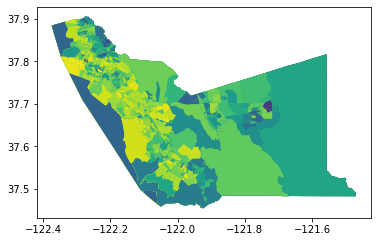

In [5]:
ball.plot(column='iqv_2013')

<AxesSubplot:>

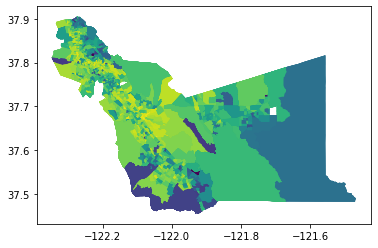

In [6]:
ball.plot(column='iqv_2019')

In [ ]:
ball.to_file('ethnicityindex.geojson', driver='GeoJSON')

In both the maps, we now see some patterns. It might be interesting to do spatial autocorrelation now and also overlay the stations. 

In [9]:
stations=gpd.read_file("stations.geojson")
tod=stations[stations['TOD']=='Yes']
ntod=stations[stations['TOD']=='No']

In [12]:
# reproject to Web Mercator
ball_webmer = ball.to_crs(epsg=3857)

stations_webmer = stations.to_crs(epsg=3857)
tod_wm=tod.to_crs(epsg=3857)
ntod_wm=ntod.to_crs(epsg=3857)

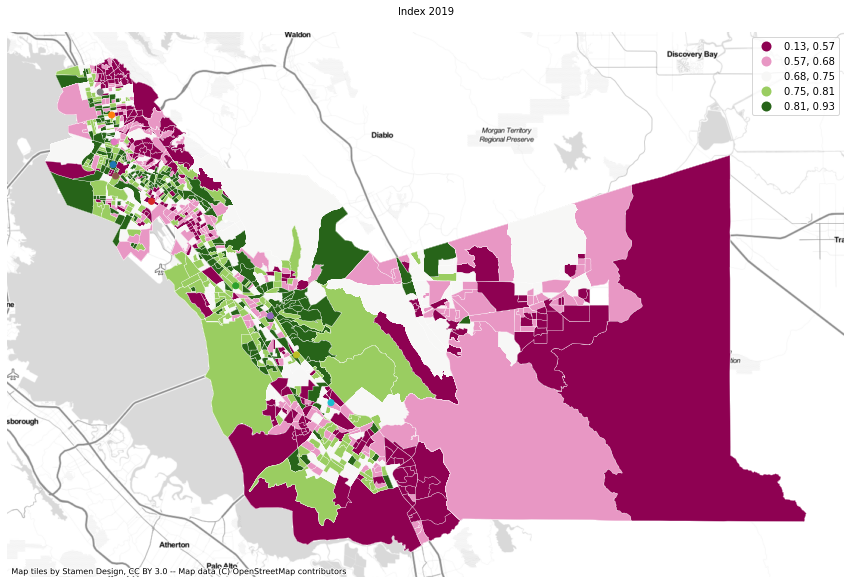

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
ball_webmer.plot(column=ball['iqv_2019'],
                        cmap='PiYG', 
                        scheme='quantiles',
                        edgecolor='white', 
                        linewidth=0.3, 
                        ax=ax, 
                        legend=True
                       )
stations_webmer.plot(column=stations['Station'],
                         ax=ax
                        )
ax.axis('off')
ax.set_title('Index 2019',fontsize=10,pad=18)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

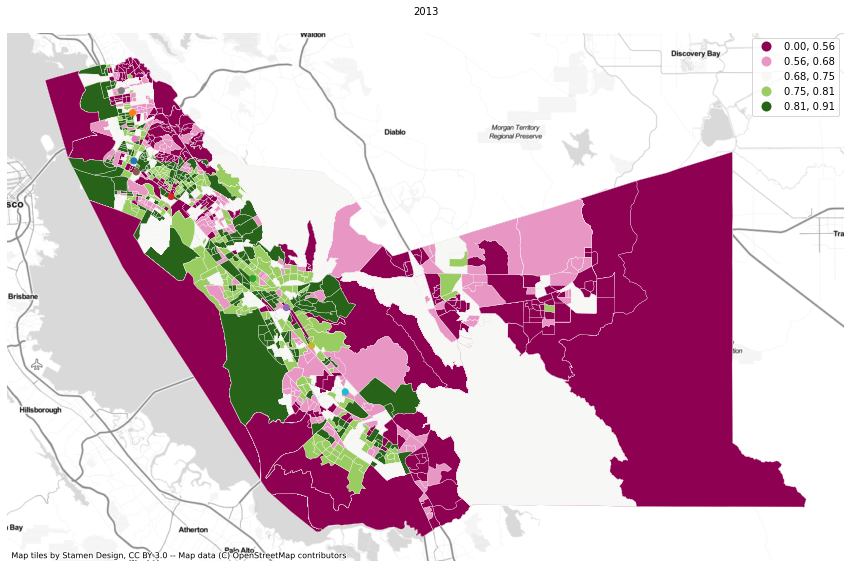

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
ball_webmer.plot(column=ball['iqv_2013'],
                        cmap='PiYG', 
                        scheme='quantiles',
                        edgecolor='white', 
                        linewidth=0.3, 
                        ax=ax, 
                        legend=True
                       )
stations_webmer.plot(column=stations['Station'],
                         ax=ax
                        )
ax.axis('off')
ax.set_title('2013',fontsize=10,pad=18)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

AttributeError: 'numpy.ndarray' object has no attribute 'axis'

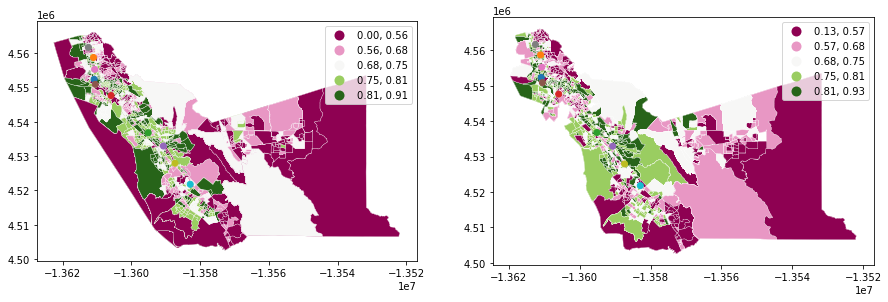

In [14]:
fig, ax = plt.subplots(1,2,figsize=(15, 15))
ax1,ax2=ax
ball_webmer.plot(column=ball['iqv_2013'],
                        cmap='PiYG', 
                        scheme='quantiles',
                        edgecolor='white', 
                        linewidth=0.3, 
                        ax=ax1, 
                        legend=True
                       )
stations_webmer.plot(column=stations['Station'],
                         ax=ax1
                        )

ball_webmer.plot(column=ball['iqv_2019'],
                        cmap='PiYG', 
                        scheme='quantiles',
                        edgecolor='white', 
                        linewidth=0.3, 
                        ax=ax2, 
                        legend=True
                       )
stations_webmer.plot(column=stations['Station'],
                         ax=ax2
                        )
ax.axis('off')
ax.set_title('Index 2019',fontsize=10,pad=18)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

In [1]:
ball.mean(axis=0, numeric_only=True)

NameError: name 'ball' is not defined